# Data Exploration on Time Series Data for Forecasting and Anomaly Detection
Using dataset: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

Referring this link for H20 guide: https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/isolation-forest/isolation-forest.ipynb

In [2]:
import pandas as pd

data = pd.read_csv("datasets/nyc_taxi.csv")


In [3]:
data


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [4]:
data["anomaly"] = data["timestamp"].apply(
    lambda x: 1 if x
    in [
        "2014-11-01 19:00:00",
        "2014-11-27 15:30:00",
        "2014-12-25 15:00:00",
        "2015-01-01 01:00:00",
        "2015-01-27 00:00:00",
    ] else 0
)


In [5]:
data["anomaly"].sum()


5

<Axes: xlabel='timestamp', ylabel='value'>

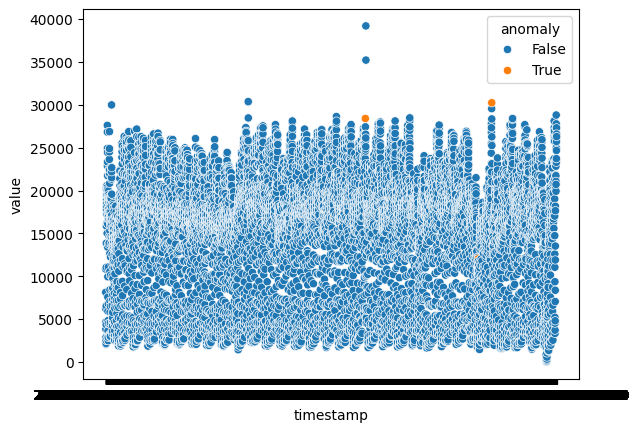

In [7]:
import seaborn as sns

sns.scatterplot(data, x="timestamp", y="value", hue="anomaly")


In [6]:
data[data["anomaly"] == 1]


,timestamp,value,anomaly
5942,2014-11-01 19:00:00,28398,1
7183,2014-11-27 15:30:00,15255,1
8526,2014-12-25 15:00:00,12039,1
8834,2015-01-01 01:00:00,30236,1
10080,2015-01-27 00:00:00,109,1


In [7]:
data.dtypes


timestamp    object
value         int64
anomaly       int64
dtype: object

In [ ]:
train_data = data[data.timestamp < "2014-11-01 19:00:00"]
